In [ ]:
!nvidia-smi

Sat Apr 27 16:31:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


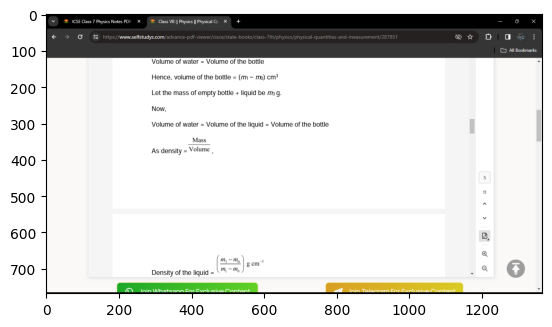

In [ ]:
image = cv2.imread('/content/Screenshot 2024-04-06 131713.png')
plt.imshow(image)

In [ ]:
type(image)

numpy.ndarray

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[250, 249, 248],
        [250, 249, 248],
        [250, 249, 248],
        ...,
        [241, 241, 241],
        [241, 241, 241],
        [241, 241, 241]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/dataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall('/content')
  print('Done')

Done


In [ ]:
training_Data = []

In [ ]:
# ANGRY

i = 0
path = '/content/dataset/train/angry'
for img in os.listdir(path):
  # if i==1470:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,0])
  except Exception as e:
    pass

In [ ]:
len(training_Data)

3984

In [ ]:
# FEAR

i = 0
path = '/content/dataset/train/fear'

for img in os.listdir(path):
  # if i==1491:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,2])
  except Exception as e:
    pass

In [ ]:
len(training_Data)

8078

In [ ]:
# DISGUST

i = 0
path = '/content/dataset/train/disgust'

for img in os.listdir(path):
  # if i==158:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,1])
  except Exception as e:
    pass

In [ ]:
# HAPPY

i = 0
path = '/content/dataset/train/happy'

for img in os.listdir(path):
  # if i==2625:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,3])
  except Exception as e:
    pass

In [ ]:
# NEUTRAL

i = 0
path = '/content/dataset/train/neutral'

for img in os.listdir(path):
  # if i==1816:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,4])
  except Exception as e:
    pass

In [ ]:
# SAD

i = 0
path = '/content/dataset/train/sad'

for img in os.listdir(path):
  # if i==1764:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,5])
  except Exception as e:
    pass

In [ ]:
# SURPRISE

i = 0
path = '/content/dataset/train/surprise'

for img in os.listdir(path):
  # if i==1155:
  #   break
  # i = i+1
  try:
    img_arr = cv2.imread(os.path.join(path,img))
    # new_arr = cv2.resize(img_arr,(224,224))
    training_Data.append([img_arr,6])
  except Exception as e:
    pass

In [ ]:
len(training_Data)

28573

In [ ]:
import random
random.shuffle(training_Data)

In [ ]:
X = []
Y = []

for feature,label in training_Data:
  X.append(feature)
  Y.append(label)

X = np.array(X).reshape(-1,48,48,3) #Converting to 4 dimensions

In [ ]:
X = X/255.0

In [ ]:
Y = np.array(Y)

In [ ]:
X.shape

(28573, 48, 48, 3)

#Self-Designed Model 1 - 67% Till Now

*   List item
*   List item





In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D, DepthwiseConv2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# Importing Adam optimizer
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

In [ ]:
#TAKE 2 - 65% ACCURACY
from keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau

def build_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # x = Conv2D(32, (3, 3), padding='same')(inputs)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.25)(x)


    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.25)(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.25)(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = DepthwiseConv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)

    x = DepthwiseConv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = GlobalAveragePooling2D()(x)

    # x = Flatten()(x)

    x = Dense(1024)(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    x = Dense(1024)(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    x = Dense(512)(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    x = Dense(256)(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    x = Dense(64)(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_model(input_shape=(48, 48, 3), num_classes=7)



reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)
# early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [ ]:
def scheduler(epoch,lr):
  if epoch < 10:
    return lr
  else:
    return lr * 0.9

In [ ]:
lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(2048, activation= 'relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
X.shape

(28709, 48, 48, 3)

In [ ]:
Y = tf.expand_dims(Y, axis=-1)
# Y = Y.reshape(-1,1)

In [ ]:
Y = to_categorical(Y,num_classes=7)

In [ ]:
model.summary()

In [ ]:
model.fit(X, Y, epochs=50)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate the image by up to 10 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift the image vertically by up to 10% of the height
    shear_range=0.1,  # Apply shear transformation
    zoom_range=0.1,  # Zoom the image by up to 10%
    horizontal_flip=True,  # Flip the image horizontally
    vertical_flip=False,  # Do not flip the image vertically
    fill_mode='nearest'  # Fill in newly created pixels using the nearest existing pixel
)

In [ ]:
train_generator = datagen.flow(X, Y, batch_size=32)

In [ ]:
model.fit(train_generator,epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
893/893 [==============================] - 54s 52ms/step - loss: 1.9848 - accuracy: 0.2160 - lr: 0.0010
Epoch 2/50
893/893 [==============================] - 46s 51ms/step - loss: 1.6959 - accuracy: 0.3247 - lr: 0.0010
Epoch 3/50
893/893 [==============================] - 46s 51ms/step - loss: 1.5155 - accuracy: 0.4107 - lr: 0.0010
Epoch 4/50
893/893 [==============================] - 46s 52ms/step - loss: 1.4067 - accuracy: 0.4580 - lr: 0.0010
Epoch 5/50
893/893 [==============================] - 45s 51ms/step - loss: 1.3504 - accuracy: 0.4867 - lr: 0.0010
Epoch 6/50
893/893 [==============================] - 46s 52ms/step - loss: 1.3125 - accuracy: 0.5022 - lr: 0.0010
Epoch 7/50
893/893 [==============================] - 46s 51ms/step - loss: 1.2752 - accuracy: 0.5204 - lr: 0.0010
Epoch 8/50
893/893 [==============================] - 46s 51ms/step - loss: 1.2412 - accuracy: 0.5353 - lr: 0.0010
Epoch 9/50
893/893 [==============================] - 46s 51ms/step - loss: 1.22

In [ ]:
# model.fit(X,Y,epochs=30,batch_size=32, callbacks=[lr_scheduler])

In [ ]:
model.evaluate(X,Y)

893/893 [==============================] - 5s 5ms/step - loss: 0.7226 - accuracy: 0.7338


[0.7225728631019592, 0.7338396310806274]

In [ ]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
test_images = []
test_labels = []

testPath = '/content/dataset/test/'
for label in os.listdir(testPath):
  emotion_folders = os.path.join(testPath,label)
  for images in os.listdir(emotion_folders):
    img_arr = cv2.imread(os.path.join(emotion_folders,images))
    # new_arr = cv2.resize(img_arr,(224,224))
    image = np.expand_dims(img_arr,axis=0)
    test_images.append(image)
    test_labels.append(classes.index(label))


test_images = np.array(test_images).reshape(-1,48,48,3)
test_labels = np.array(test_labels)

test_images = test_images/255.0

model.evaluate(test_images,test_labels)

202/202 [==============================] - 1s 7ms/step - loss: 0.9119 - accuracy: 0.6712


[0.9119459390640259, 0.6712243556976318]

In [ ]:
model.save('Model3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#SELF TRAINED MODEL 2 - 68% Till now

In [ ]:
model = tf.keras.applications.EfficientNetB2()

37432240/37432240 [==============================] - 1s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D, DepthwiseConv2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# Importing Adam optimizer
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

In [ ]:
from keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau

def build_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # x = Conv2D(32, (3, 3), padding='same')(inputs)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.25)(x)


    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.25)(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # x = Dropout(0.25)(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)

    # x = DepthwiseConv2D(32, (3, 3), padding='same')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(pool_size=(2, 2))(x)

    # x = DepthwiseConv2D(32, (3, 3), padding='same')(x)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)

    x = GlobalAveragePooling2D()(x)

    # x = Flatten()(x)

    dense1 = Dense(1024)(x)
    dense1 = Activation('relu')(dense1)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.25)(dense1)

    dense2 = Dense(1024)(x)
    dense2 = Activation('relu')(dense2)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.25)(dense2)

    dense1024 = Add()([dense1,dense2])

    dense3 = Dense(1024)(dense1024)
    dense3 = Activation('relu')(dense3)
    dense3 = BatchNormalization()(dense3)
    dense3 = Dropout(0.25)(dense3)

    dense4 = Dense(1024)(dense1024)
    dense4 = Activation('relu')(dense4)
    dense4 = BatchNormalization()(dense4)
    dense4 = Dropout(0.25)(dense4)

    dense1024_2 = Add()([dense3,dense4])

    # dense3 = Dense(512)(dense1024)
    # dense3 = Activation('relu')(dense3)
    # dense3 = BatchNormalization()(dense3)
    # dense3 = Dropout(0.25)(dense3)

    # dense4 = Dense(512)(dense1024)
    # dense4 = Activation('relu')(dense4)
    # dense4 = BatchNormalization()(dense4)
    # dense4 = Dropout(0.25)(dense4)

    # dense512_1 = Add()([dense3,dense4])

    # dense7 = Dense(512)(dense512_1)
    # dense7 = Activation('relu')(dense7)
    # dense7 = BatchNormalization()(dense7)
    # dense7 = Dropout(0.25)(dense7)

    # dense8 = Dense(512)(dense512_1)
    # dense8 = Activation('relu')(dense8)
    # dense8 = BatchNormalization()(dense8)
    # dense8 = Dropout(0.25)(dense8)

    # dense512_2 = Add()([dense7,dense8])

    # dense5 = Dense(256)(dense512_2)
    # dense5 = Activation('relu')(dense5)
    # dense5 = BatchNormalization()(dense5)
    # dense5 = Dropout(0.25)(dense5)

    # dense6 = Dense(256)(dense512_2)
    # dense6 = Activation('relu')(dense6)
    # dense6 = BatchNormalization()(dense6)
    # dense6 = Dropout(0.25)(dense6)

    # dense256 = Add()([dense5,dense6])

    outputs = Dense(num_classes, activation='softmax')(dense1024_2)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_model(input_shape=(48, 48, 3), num_classes=7)



# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
#                               patience=5, min_lr=0.0001)
# early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 48, 48, 64)           1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_7 (Bat  (None, 48, 48, 64)           256       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation_7 (Activation)   (None, 48, 48, 64)           0         ['batch_normalization_7[

In [ ]:
def scheduler(epoch,lr):
  if epoch < 10:
    return lr
  else:
    return lr * 0.9

In [ ]:
lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate the image by up to 10 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift the image vertically by up to 10% of the height
    shear_range=0.1,  # Apply shear transformation
    zoom_range=0.1,  # Zoom the image by up to 10%
    horizontal_flip=True,  # Flip the image horizontally
    vertical_flip=False,  # Do not flip the image vertically
    fill_mode='nearest'  # Fill in newly created pixels using the nearest existing pixel
)

In [ ]:
train_generator = datagen.flow(X, Y, batch_size=32)

In [ ]:
model.fit(train_generator,epochs=20, callbacks=[lr_scheduler])

Epoch 1/20
893/893 [==============================] - 41s 45ms/step - loss: 0.7812 - accuracy: 0.7119 - lr: 1.2158e-04
Epoch 2/20
893/893 [==============================] - 33s 37ms/step - loss: 0.7756 - accuracy: 0.7131 - lr: 1.2158e-04
Epoch 3/20
893/893 [==============================] - 33s 36ms/step - loss: 0.7681 - accuracy: 0.7169 - lr: 1.2158e-04
Epoch 4/20
893/893 [==============================] - 31s 35ms/step - loss: 0.7614 - accuracy: 0.7185 - lr: 1.2158e-04
Epoch 5/20
893/893 [==============================] - 32s 36ms/step - loss: 0.7612 - accuracy: 0.7166 - lr: 1.2158e-04
Epoch 6/20
893/893 [==============================] - 32s 35ms/step - loss: 0.7523 - accuracy: 0.7173 - lr: 1.2158e-04
Epoch 7/20
893/893 [==============================] - 31s 35ms/step - loss: 0.7543 - accuracy: 0.7213 - lr: 1.2158e-04
Epoch 8/20
893/893 [==============================] - 33s 37ms/step - loss: 0.7427 - accuracy: 0.7254 - lr: 1.2158e-04
Epoch 9/20
893/893 [============================

In [ ]:
model = tf.keras.models.load_model('/content/Model2 (3).h5')

In [ ]:
model.evaluate(X,Y)

NameError: name 'X' is not defined

In [ ]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
test_images = []
test_labels = []
predictions = []

testPath = '/content/dataset/test/'
for label in os.listdir(testPath):
  emotion_folders = os.path.join(testPath,label)
  for images in os.listdir(emotion_folders):
    img_arr = cv2.imread(os.path.join(emotion_folders,images))
    # new_arr = cv2.resize(img_arr,(224,224))
    image = np.expand_dims(img_arr,axis=0)
    test_images.append(image)
    test_labels.append(classes.index(label))
    image = image/255.0
    predictions.append(np.argmax(model.predict(image)))


# test_images = np.array(test_images).reshape(-1,48,48,3)
# test_labels = np.array(test_labels)

# test_images = test_images/255.0

# model.evaluate(test_images,test_labels)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(test_labels, predictions))

confusion_mat = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       965
           1       0.74      0.44      0.55       125
           2       0.60      0.42      0.49       945
           3       0.90      0.87      0.88      1776
           4       0.58      0.76      0.66       992
           5       0.55      0.54      0.54       957
           6       0.76      0.82      0.79       676

    accuracy                           0.69      6436
   macro avg       0.68      0.64      0.65      6436
weighted avg       0.69      0.69      0.68      6436

Confusion Matrix:
[[ 613    9   69   35  110  113   16]
 [  37   55   11    3    7   12    0]
 [ 133    2  398   26  128  161   97]
 [  37    0   31 1539  100   29   40]
 [  49    4   33   43  756   94   13]
 [ 111    3   87   43  189  514   10]
 [  28    1   37   27   20    8  555]]


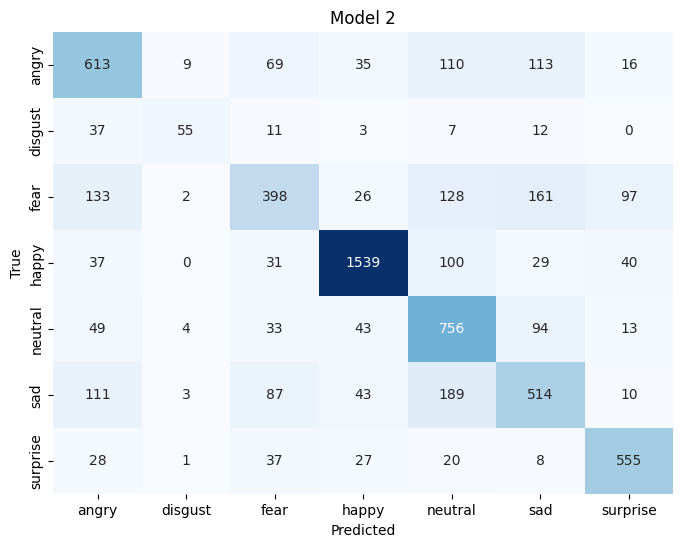

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the Matplotlib figure and axis
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Model 2')
plt.show()

In [ ]:
model.save('Model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#USING ONLY 3 CLASSES
classes = ['angry','happy','neutral']
test_images = []
test_labels = []


testPath = '/content/dataset/test/'
for label in classes:
  print(label)
  emotion_folders = os.path.join(testPath,label)
  for images in os.listdir(emotion_folders):
    img_arr = cv2.imread(os.path.join(emotion_folders,images))
    # new_arr = cv2.resize(img_arr,(224,224))
    image = np.expand_dims(img_arr,axis=0)
    test_images.append(image)
    if label == 'angry':
      test_labels.append(0)
    if label == 'happy':
      test_labels.append(3)
    if label == 'neutral':
      test_labels.append(4)



test_images = np.array(test_images).reshape(-1,48,48,3)
test_labels = np.array(test_labels)

test_images = test_images/255.0

model.evaluate(test_images,test_labels)

angry
happy
neutral
117/117 [==============================] - 1s 10ms/step - loss: 0.4253 - accuracy: 0.8361


[0.42533499002456665, 0.8360567688941956]

In [ ]:
len(test_images)

3733

In [ ]:
import os
import cv2
import numpy as np



# Assuming 'hybrid_model' is already defined and trained

classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
test_images = []
test_labels = []

testPath = '/content/dataset/test/'
for label in os.listdir(testPath):
    emotion_folders = os.path.join(testPath, label)
    for images in os.listdir(emotion_folders):
        img_arr = cv2.imread(os.path.join(emotion_folders, images))
        img_arr = cv2.resize(img_arr, (48, 48))  # Resize image to match input shape
        test_images.append(img_arr)
        test_labels.append(classes.index(label))

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Normalize pixel values
test_images = test_images / 255.0

# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Alternatively, you can make predictions and calculate metrics manually
predictions = np.argmax(model.predict(test_images), axis=1)
accuracy = np.mean(predictions == test_labels)
print("Test Accuracy (Manual):", accuracy)

# Calculate and print other evaluation metrics if needed


202/202 [==============================] - 1s 5ms/step - loss: 0.9202 - accuracy: 0.6684
Test Loss: 0.9202250838279724
Test Accuracy: 0.668425977230072
202/202 [==============================] - 1s 3ms/step
Test Accuracy (Manual): 0.668425954672462



# Self Designed Model - 69% accuracy





In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D, DepthwiseConv2D, Add, ZeroPadding2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.layers import Conv2D
from keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# Importing Adam optimizer
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

In [ ]:
from keras.layers import Dropout, Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, GlobalAveragePooling2D, Add
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model

def build_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), padding='same', activation='relu', name='conv1')(inputs)
    x = BatchNormalization(name='batchnorm1')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2')(x)
    x = BatchNormalization(name='batchnorm2')(x)
    x = MaxPooling2D(pool_size=(2, 2), name='maxpool1')(x)
    x = Dropout(0.25, name='dropout1')(x)

    x = Conv2D(128, (3, 3), padding='same', activation='relu', name='conv3')(x)
    x = BatchNormalization(name='batchnorm3')(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu', name='conv4')(x)
    x = BatchNormalization(name='batchnorm4')(x)
    x = MaxPooling2D(pool_size=(2, 2), name='maxpool2')(x)
    x = Dropout(0.25, name='dropout2')(x)

    x = Conv2D(256, (3, 3), padding='same', activation='relu', name='conv5')(x)
    x = BatchNormalization(name='batchnorm5')(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu', name='conv6')(x)
    x = BatchNormalization(name='batchnorm6')(x)
    x = MaxPooling2D(pool_size=(2, 2), name='maxpool3')(x)
    x = Dropout(0.25, name='dropout3')(x)

    x = GlobalAveragePooling2D(name='global_avg_pooling')(x)

    x = Dense(512, activation='relu', name='dense1')(x)
    x = BatchNormalization(name='batchnorm7')(x)
    x = Dropout(0.5, name='dropout4')(x)

    x = Dense(256, activation='relu', name='dense2')(x)
    x = BatchNormalization(name='batchnorm8')(x)
    x = Dropout(0.5, name='dropout5')(x)

    outputs = Dense(num_classes, activation='softmax', name='output')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


model = build_model(input_shape=(48, 48, 3), num_classes=7)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)


In [ ]:
def build_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), padding='same', activation='relu', name='conv1')(inputs)

    x = Conv2D(128, (3, 3), padding='same', activation='relu', name='conv2')(x)

    x = Conv2D(256, (3, 3), padding='same', activation='relu', name='conv3')(x)

    x = MaxPooling2D(pool_size=(2, 2), name='maxpool1')(x)

    x = GlobalAveragePooling2D(name='global_avg_pooling')(x)

    x = Dense(512, activation='relu', name='dense1')(x)

    x = BatchNormalization(name='batchnorm1')(x)

    x = Dropout(0.5, name='dropout1')(x)

    outputs = Dense(num_classes, activation='softmax', name='output')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

model = build_model(input_shape=(48, 48, 3), num_classes=7)

# tfjs.converters.save_keras_model(model, 'models')

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), input_shape=(48,48,3), padding='same', activation='relu', name='conv1'),
    Conv2D(128, (3, 3), padding='same', activation='relu', name='conv2'),
    Conv2D(256, (3, 3), padding='same', activation='relu', name='conv3'),
    MaxPooling2D(pool_size=(2, 2), name='maxpool1'),
    GlobalAveragePooling2D(name='global_avg_pooling'),
    Dense(512, activation='relu', name='dense1'),
    BatchNormalization(name='batchnorm1'),
    Dropout(0.5, name='dropout1'),
    Dense(units=7, activation='softmax')
])

In [ ]:
i = 0
for layer in model.layers:
  i += 1
  print(f"Layer: {layer.name}")
  for weight in layer.weights:
    weight.name = weight.name + str(i)
    print(f'Weight Name: {weight.name}')

Layer: input_layer
Layer: conv1
Weight Name: kernel2
Weight Name: bias2
Layer: batchnorm1
Weight Name: gamma3
Weight Name: beta3
Weight Name: moving_mean3
Weight Name: moving_variance3
Layer: conv2
Weight Name: kernel4
Weight Name: bias4
Layer: batchnorm2
Weight Name: gamma5
Weight Name: beta5
Weight Name: moving_mean5
Weight Name: moving_variance5
Layer: maxpool1
Layer: dropout1
Layer: conv3
Weight Name: kernel8
Weight Name: bias8
Layer: batchnorm3
Weight Name: gamma9
Weight Name: beta9
Weight Name: moving_mean9
Weight Name: moving_variance9
Layer: conv4
Weight Name: kernel10
Weight Name: bias10
Layer: batchnorm4
Weight Name: gamma11
Weight Name: beta11
Weight Name: moving_mean11
Weight Name: moving_variance11
Layer: maxpool2
Layer: dropout2
Layer: conv5
Weight Name: kernel14
Weight Name: bias14
Layer: batchnorm5
Weight Name: gamma15
Weight Name: beta15
Weight Name: moving_mean15
Weight Name: moving_variance15
Layer: conv6
Weight Name: kernel16
Weight Name: bias16
Layer: batchnorm6
We

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
def scheduler(epoch,lr):
  if epoch < 10:
    return lr
  else:
    return lr * 0.9

In [ ]:
lr_scheduler = LearningRateScheduler(scheduler)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate the image by up to 10 degrees
    width_shift_range=0.1,  # Shift the image horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift the image vertically by up to 10% of the height
    shear_range=0.1,  # Apply shear transformation
    zoom_range=0.1,  # Zoom the image by up to 10%
    horizontal_flip=True,  # Flip the image horizontally
    vertical_flip=False,  # Do not flip the image vertically
    fill_mode='nearest'  # Fill in newly created pixels using the nearest existing pixel
)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 48, 48, 64)        1792      
                                                                 
 batchnorm1 (BatchNormaliza  (None, 48, 48, 64)        256       
 tion)                                                           
                                                                 
 conv2 (Conv2D)              (None, 48, 48, 64)        36928     
                                                                 
 batchnorm2 (BatchNormaliza  (None, 48, 48, 64)        256       
 tion)                                                           
                                                                 
 maxpool1 (MaxPooling2D)     (None, 24, 24, 64)        0     

In [ ]:
model.layers

In [ ]:
train_generator = datagen.flow(X, Y, batch_size=32)

In [ ]:
model.fit(train_generator,epochs=30, callbacks=[lr_scheduler])

Epoch 1/30
893/893 [==============================] - 37s 42ms/step - loss: 2.1278 - accuracy: 0.2054 - lr: 0.0010
Epoch 2/30
893/893 [==============================] - 37s 41ms/step - loss: 1.7550 - accuracy: 0.2889 - lr: 0.0010
Epoch 3/30
893/893 [==============================] - 36s 40ms/step - loss: 1.4887 - accuracy: 0.4228 - lr: 0.0010
Epoch 4/30
893/893 [==============================] - 36s 40ms/step - loss: 1.3387 - accuracy: 0.4904 - lr: 0.0010
Epoch 5/30
893/893 [==============================] - 38s 43ms/step - loss: 1.2528 - accuracy: 0.5258 - lr: 0.0010
Epoch 6/30
893/893 [==============================] - 36s 41ms/step - loss: 1.1988 - accuracy: 0.5483 - lr: 0.0010
Epoch 7/30
893/893 [==============================] - 35s 39ms/step - loss: 1.1642 - accuracy: 0.5611 - lr: 0.0010
Epoch 8/30
893/893 [==============================] - 37s 41ms/step - loss: 1.1355 - accuracy: 0.5719 - lr: 0.0010
Epoch 9/30
893/893 [==============================] - 38s 43ms/step - loss: 1.10

In [ ]:
model.save('Model.keras')

In [ ]:
model.save('Model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = tf.keras.models.load_model('Model1.h5')

In [ ]:
model.evaluate(X,Y)

893/893 [==============================] - 7s 7ms/step - loss: 0.6664 - accuracy: 0.7535


[0.6663842797279358, 0.7535085678100586]

In [ ]:
from keras.models import model_from_json

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Load the model architecture from the JSON file
loaded_model = model_from_json(model_json)

In [ ]:
loaded_model.load_weights("/content/Model.h5")

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model,'/content/drive/MyDrive/modelstest1')

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
model.save('Model.h5')

In [ ]:
image_arr = cv2.imread('/content/dataset/test/angry/PrivateTest_10131363.jpg')

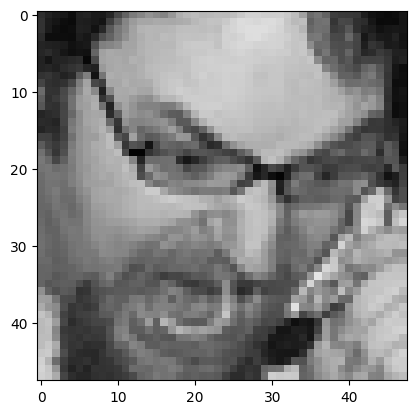

In [ ]:
plt.imshow(image)

In [ ]:
image = np.expand_dims(image_arr,axis=0)
image = image/255.0

In [ ]:
np.argmax(model.predict(image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step


0

In [ ]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
test_images = []
test_labels = []
predictions = []

testPath = '/content/dataset/test/'
for label in os.listdir(testPath):
  emotion_folders = os.path.join(testPath,label)
  for images in os.listdir(emotion_folders):
    img_arr = cv2.imread(os.path.join(emotion_folders,images))
    # new_arr = cv2.resize(img_arr,(224,224))
    image = np.expand_dims(img_arr,axis=0)
    test_images.append(image)
    test_labels.append(classes.index(label))
    # image = image/255.0
    # predictions.append(np.argmax(model.predict(image)))


test_images = np.array(test_images).reshape(-1,48,48,3)
test_labels = np.array(test_labels)

test_images = test_images/255.0

model.evaluate(test_images,test_labels)

202/202 [==============================] - 2s 8ms/step - loss: 0.8829 - accuracy: 0.6805


[0.8829164505004883, 0.6805469393730164]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(test_labels, predictions))

confusion_mat = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

Classification Report:


ValueError: Found input variables with inconsistent numbers of samples: [6436, 0]

In [ ]:
model.evaluate(test_images,test_labels)

202/202 [==============================] - 2s 8ms/step - loss: 0.8690 - accuracy: 0.6947


[0.8690444231033325, 0.6946861147880554]

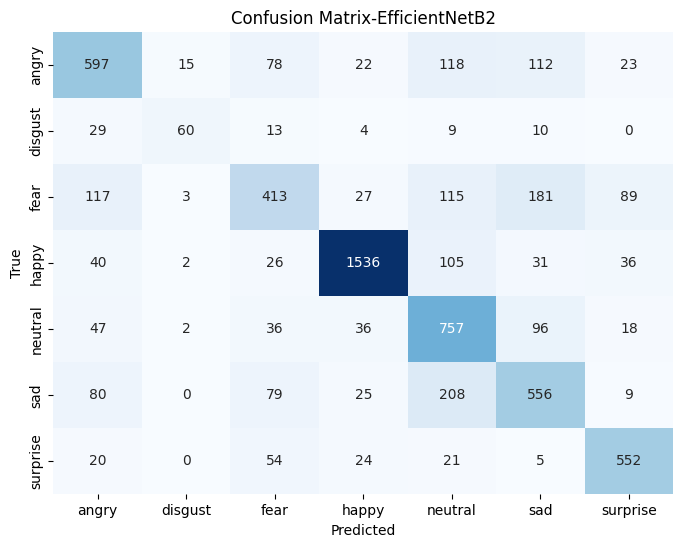

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the Matplotlib figure and axis
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-EfficientNetB2')
plt.show()


#Model Tesing

In [ ]:
model3 = tf.keras.models.load_model('/content/Model3.h5')
model1 = tf.keras.models.load_model('/content/Model1.h5')
model2 = tf.keras.models.load_model('/content/Model2.h5')

In [ ]:
model3.summary()

In [ ]:
from collections import Counter

In [ ]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
test_images = []
test_labels = []
# predictions1 = []
# predictions2 = []
# predictions3 = []
predictions = []

testPath = '/content/dataset/test/'
for label in os.listdir(testPath):
  emotion_folders = os.path.join(testPath,label)
  for images in os.listdir(emotion_folders):
    img_arr = cv2.imread(os.path.join(emotion_folders,images))
    image = np.expand_dims(img_arr,axis=0)
    test_images.append(image)
    test_labels.append(classes.index(label))
    image = image/255.0
    Predictions1 = model1.predict(image)
    Predictions2 = model2.predict(image)
    Predictions3 = model3.predict(image)

    final_preds = []

    final_preds.append(np.argmax(Predictions1))
    final_preds.append(np.argmax(Predictions2))
    final_preds.append(np.argmax(Predictions3))

    counts = Counter(final_preds)
    emo = (counts.most_common(1)[0])[0]
    predictions.append(emo)


# test_images = np.array(test_images).reshape(-1,48,48,3)
# test_labels = np.array(test_labels)

# test_images = test_images/255.0

# model3.evaluate(test_images,test_labels)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(test_labels, predictions))

confusion_mat = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       965
           1       0.77      0.42      0.55       125
           2       0.61      0.41      0.49       945
           3       0.90      0.88      0.89      1776
           4       0.55      0.79      0.65       992
           5       0.59      0.55      0.57       957
           6       0.76      0.79      0.78       676

    accuracy                           0.69      6436
   macro avg       0.69      0.64      0.65      6436
weighted avg       0.70      0.69      0.69      6436

Confusion Matrix:
[[ 620    9   67   32  132   86   19]
 [  43   53    9    2    8    9    1]
 [ 133    4  392   24  148  155   89]
 [  30    1   24 1556  108   25   32]
 [  41    1   31   42  786   77   14]
 [  93    1   63   38  228  524   10]
 [  25    0   55   29   25    7  535]]


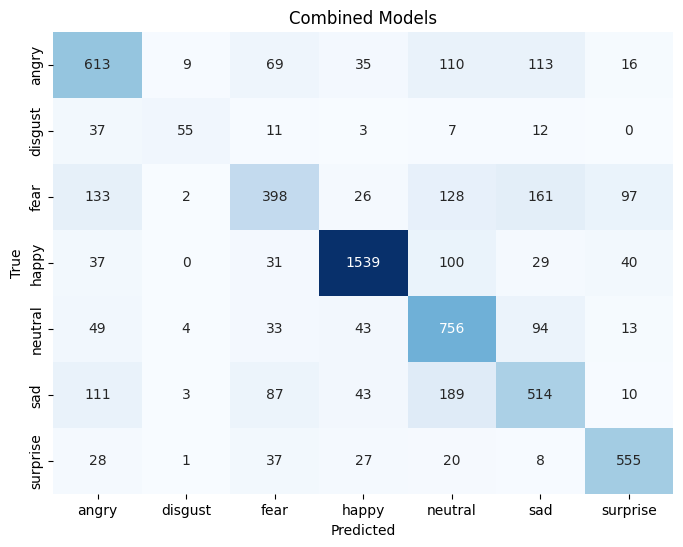

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the Matplotlib figure and axis
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Combined Models')
plt.show()

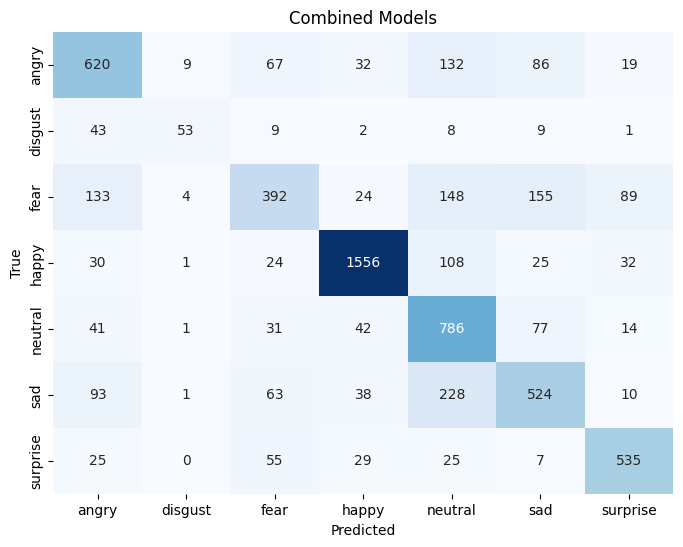

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the Matplotlib figure and axis
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Combined Models')
plt.show()
